In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dir1 = r"/Users/zhilinyang/Desktop/dataset/data_Q1_2017"
dir2 = r"/Users/zhilinyang/Desktop/dataset/data_Q2_2017"
dir3 = r"/Users/zhilinyang/Desktop/dataset/data_Q3_2017"
dir4 = r"/Users/zhilinyang/Desktop/dataset/data_Q4_2017"
root_dir=[dir1,dir2,dir3,dir4]


In [ ]:
featuresST = ['smart_1_normalized','smart_1_raw',
            'smart_5_normalized','smart_5_raw',
            'smart_7_normalized','smart_7_raw',
            'smart_184_normalized','smart_184_raw',
            'smart_188_raw','smart_240_raw',
            'smart_189_normalized','smart_189_raw',
            'smart_190_normalized','smart_190_raw',
            'smart_193_normalized','smart_193_raw',
            'smart_194_normalized','smart_194_raw',
            'smart_197_normalized','smart_197_raw',
            'smart_198_normalized','smart_198_raw',
            'smart_241_raw','smart_242_raw']

In [ ]:
 for i in range(0,4): 
    for file in os.listdir(root_dir[i]):
        file_name = root_dir[i] + '/' + file
        df = pd.read_csv(file_name, header=None)
        colname = df.iloc[0]
        df = df.iloc[1:]
        df.columns = colname

        #Select all Seagate A samples and its features
        dfST = df[df['model'].str.match('ST4000DM000')]
        dfST=pd.concat([dfST['date'],dfST['serial_number'],dfST[featuresST],dfST['failure']],axis=1)
        dfST.dropna(axis=0)
        #combine all dates' data into a single file
        dfST.to_csv(path_or_buf=r"/Users/zhilinyang/Desktop/STA_combine.csv", mode='a')


Here I met a bug: I don't know why there happens to be an addtional empty file called '.DStore' appearing in the 4th folder, and I must skip it

In [ ]:
#to process the 4th folder and skip the empty one
i=3
omit=True
for file in os.listdir(root_dir[i]):
        if omit:
            omit=False
            continue
        file_name = root_dir[i] + '/' + file
        df = pd.read_csv(file_name, header=None)
        colname = df.iloc[0]
        df = df.iloc[1:]
        df.columns = colname
        #Select all Seagate A samples and its features
        dfST = df[df['model'].str.match('ST4000DM000')]
        dfST=pd.concat([dfST['date'],dfST['serial_number'],dfST[featuresST],dfST['failure']],axis=1)
        dfST.dropna(axis=0)
        #combine all dates' data into a single file
        dfST.to_csv(path_or_buf=r"/Users/zhilinyang/Desktop/STA_combine.csv", mode='a')


In [3]:
newdf=pd.read_csv("/Users/zhilinyang/Desktop/STA_combine.csv",header=None)

/Users/zhilinyang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
total_df=newdf.iloc[:,1:]
colname=total_df.iloc[0]
total_df=total_df.iloc[1:,:]
total_df.columns=colname
total_df.head()

,date,serial_number,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_184_normalized,smart_184_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_241_raw,smart_242_raw,failure
1,2017-01-01,Z305B2QN,113,58173272,100,0,85,388359773,100,0,...,33904,24,24,100,0,100,0,30780539952,8290868549,0
2,2017-01-01,Z302A0YH,114,75626904,100,0,88,785458463,100,0,...,39656,19,19,100,0,100,0,21648124248,162013891630,0
3,2017-01-01,Z305BT0W,112,48893128,100,0,84,316494047,100,0,...,9073,30,30,100,0,100,0,26168289344,15892146696,0
4,2017-01-01,Z302A0YE,118,192617016,100,0,75,41700086,100,0,...,14150,21,21,100,0,100,0,21261063502,236386123294,0
5,2017-01-01,Z302PGH8,114,83211536,100,0,87,640624192,100,0,...,46664,25,25,100,0,100,0,16191633244,71986710022,0


In [5]:
total_df=total_df[total_df['failure']!='failure']
total_df.head()

,date,serial_number,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_184_normalized,smart_184_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_241_raw,smart_242_raw,failure
1,2017-01-01,Z305B2QN,113,58173272,100,0,85,388359773,100,0,...,33904,24,24,100,0,100,0,30780539952,8290868549,0
2,2017-01-01,Z302A0YH,114,75626904,100,0,88,785458463,100,0,...,39656,19,19,100,0,100,0,21648124248,162013891630,0
3,2017-01-01,Z305BT0W,112,48893128,100,0,84,316494047,100,0,...,9073,30,30,100,0,100,0,26168289344,15892146696,0
4,2017-01-01,Z302A0YE,118,192617016,100,0,75,41700086,100,0,...,14150,21,21,100,0,100,0,21261063502,236386123294,0
5,2017-01-01,Z302PGH8,114,83211536,100,0,87,640624192,100,0,...,46664,25,25,100,0,100,0,16191633244,71986710022,0


In [6]:
#The column "failure" is in mixed type and needs type conversion
fail_samples_df=total_df[total_df.failure.astype('int64')==1] 
fail_samples_df.head()

,date,serial_number,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_184_normalized,smart_184_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_241_raw,smart_242_raw,failure
31021,2017-01-01,Z3015LED,117,162296184,100,0,88,675926431,100.0,0.0,...,22862.0,24,24,100,0,100,0,25379562848.0,235266179854.0,1
36992,2017-01-02,Z3004D6W,120,243309976,100,0,90,960778058,100,0,...,186593,23,23,100,0,100,0,28958397160,171818619887,1
46844,2017-01-02,Z300GPL4,111,37445368,100,0,90,982062609,82.0,18.0,...,17889.0,26,26,100,0,100,0,27978980064.0,150553095953.0,1
53418,2017-01-02,Z300CNVT,117,151213056,100,8,89,935928296,100.0,0.0,...,9339.0,26,26,100,8,100,8,29458468588.0,297292127735.0,1
57397,2017-01-02,S300X9C1,117,147629472,100,0,88,789159681,100.0,0.0,...,5115.0,28,28,100,0,100,0,21568607824.0,175199732735.0,1


In [64]:
fail_samples_df.iloc[400]

0
date                        2017-05-08
serial_number                 Z3015SZN
smart_1_normalized                 114
smart_1_raw                   68809136
smart_5_normalized                  98
smart_5_raw                       2088
smart_7_normalized                  88
smart_7_raw                  702552564
smart_184_normalized             100.0
smart_184_raw                      0.0
smart_188_raw                      0.0
smart_240_raw                  27759.0
smart_189_normalized             100.0
smart_189_raw                      0.0
smart_190_normalized              77.0
smart_190_raw                     23.0
smart_193_normalized              99.0
smart_193_raw                   3963.0
smart_194_normalized                23
smart_194_raw                       23
smart_197_normalized               100
smart_197_raw                       96
smart_198_normalized               100
smart_198_raw                       96
smart_241_raw            26284017028.0
smart_242_raw          

In [8]:
fail_name_list=fail_samples_df.iloc[:,1]
print(len(fail_name_list))
fail_name_list.head()


1072


31021    Z3015LED
36992    Z3004D6W
46844    Z300GPL4
53418    Z300CNVT
57397    S300X9C1
Name: serial_number, dtype: object

1072 failed samples in total

In [68]:
sample = total_df[total_df.iloc[:,1].str.match('Z3029FAS')]
sample.head()

,date,serial_number,smart_1_normalized,smart_1_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_184_normalized,smart_184_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_241_raw,smart_242_raw,failure
5810,2017-01-01,Z3029FAS,109,22577552,100,0,87,663351085,100.0,0.0,...,55460.0,23,23,100,8,100,8,44100337464.0,20827249316.0,0
40548,2017-01-02,Z3029FAS,113,52496344,100,0,87,665756096,100.0,0.0,...,55479.0,23,23,100,8,100,8,44122781920.0,20875281596.0,0
75284,2017-01-03,Z3029FAS,118,177107096,100,0,87,665973734,100.0,0.0,...,55492.0,23,23,100,8,100,8,44134889488.0,20879801303.0,0
110021,2017-01-04,Z3029FAS,118,201161144,100,0,87,667009359,100.0,0.0,...,55503.0,20,20,100,8,100,8,44147587128.0,20908425420.0,0
144759,2017-01-05,Z3029FAS,114,78783776,100,0,87,667334185,100.0,0.0,...,55523.0,23,23,100,8,100,8,44170661776.0,20914132833.0,0


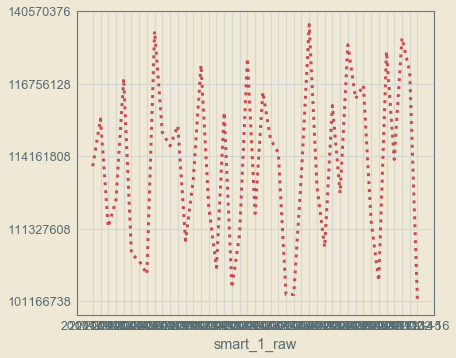

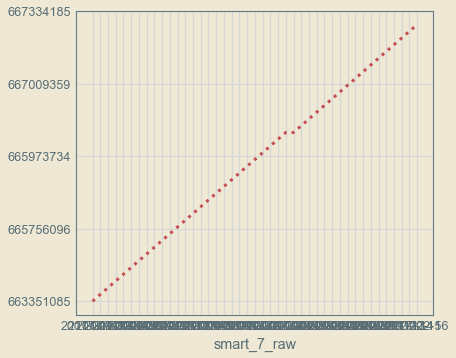

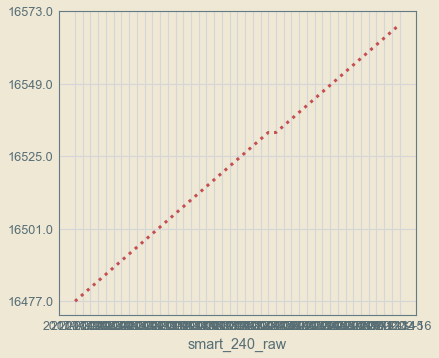

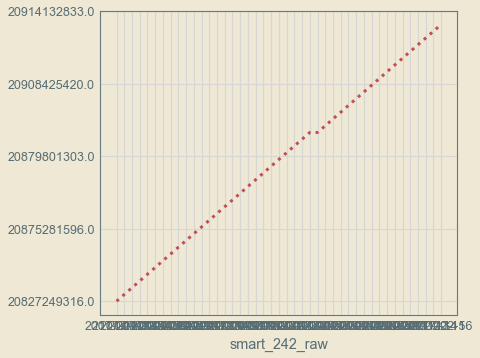

In [63]:
from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')
indicator_list=['smart_1_raw','smart_7_raw','smart_240_raw','smart_242_raw']
for ind in indicator_list:
    plt.plot(sample['date'], sample[ind], ':r',lw=3)
    y_ticks=np.linspace(0,len(sample[ind]),5)
    plt.yticks(y_ticks)
    plt.xlabel(ind)
    plt.show()

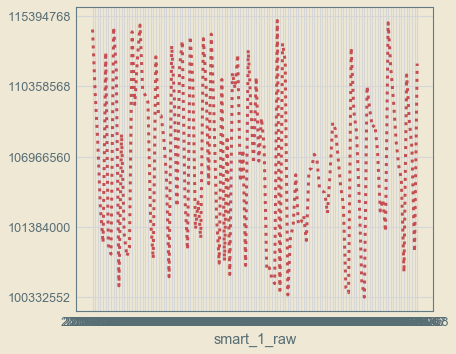

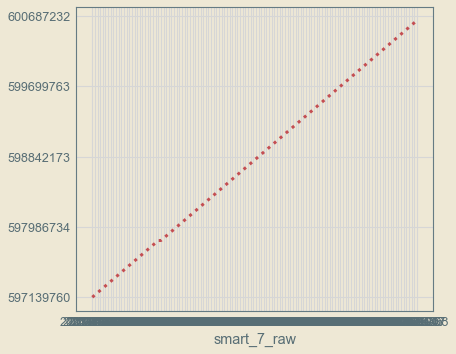

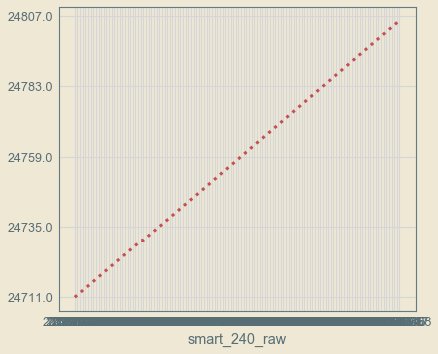

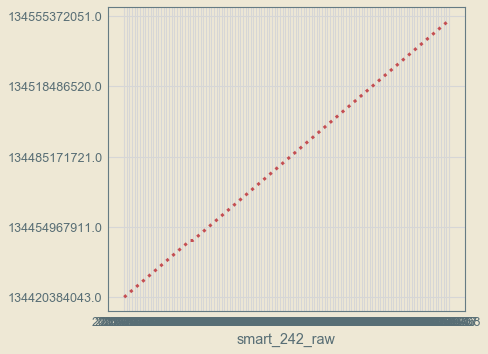

In [71]:
sample2 = total_df[total_df.iloc[:,1].str.match('Z3015SZN')]
indicator_list=['smart_1_raw','smart_7_raw','smart_240_raw','smart_242_raw']
for ind in indicator_list:
    plt.plot(sample2['date'], sample2[ind], ':r',lw=3)
    y_ticks=np.linspace(0,len(sample2[ind]),5)
    plt.yticks(y_ticks)
    plt.xlabel(ind)
    plt.show()

As we can see, the indicators' values don't change as a significant shift but rise linearly?